<a href="https://colab.research.google.com/github/dpatinoecheverri/ENV717_S23/blob/main/L5_MarketClearing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ENV717 L5- MARKET CLEARING

### If using colab, add the two lines below to mount the drive

In [1]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


### Import the necessary libraries

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Read the data

In [6]:
# Change the working directory to the folder where all the colab notebooks for this class will be stored
os.chdir('/content/drive/MyDrive/Colab Notebooks/ENV717-S2023')

In [67]:
#Read data
df_genData=pd.read_excel(io="L5MarketClearingData.xlsx",sheet_name="GeneratorsData",skiprows=1) #read data from generators tab and skip the first row
df_demandData=pd.read_excel(io="L5MarketClearingData.xlsx",sheet_name="DemandData",skiprows=1) #read data from demand tab and skip the first row

In [68]:
#Count the market participants
NumGens=len(df_genData)
NumDemands=len(df_demandData)
print("We read data for", NumGens, "generators/sellers")
print("We read data for", NumDemands, "demands/buyers")

We read data for 4 generators/sellers
We read data for 3 demands/buyers


In [69]:
df_genData.head(NumGens)

,Company,Quantity(MW),Price($/MWh)
0,A,100,50
1,B,500,28
2,C,200,30
3,D,150,53


### 1. Stack the generators by merit order - from least cost to highest

In [70]:
SupplySorted=df_genData.sort_values("Price($/MWh)",ignore_index=True)#we sort by price and "ignore the index" to reset the index so we can refer to the rows in their sorted order
SupplySorted.head(NumGens)

,Company,Quantity(MW),Price($/MWh)
0,B,500,28
1,C,200,30
2,A,100,50
3,D,150,53


### 2. Create supply curve

In [71]:
# Create a column with the cummulative capacity [MW] bid at that PRICE or less and initialize in zero
SupplySorted["CUMCAP(MW)"]=0

In [72]:
SupplySorted.head(NumGens)

,Company,Quantity(MW),Price($/MWh),CUMCAP(MW)
0,B,500,28,0
1,C,200,30,0
2,A,100,50,0
3,D,150,53,0


In [73]:
# Fill the CUMCAP column. The first row is just the QUANTITY of that plant (in that row)
SupplySorted.iloc[0,3]=SupplySorted.iloc[0,1]
# Now walk through all the rows adding the cumulative capacity. Start at row 1 since row 0 has already the right CUMCAP
for i in range (1,NumGens):  
                SupplySorted.iloc[i,3]=SupplySorted.iloc[i-1,3]+SupplySorted.iloc[i,1]
SupplySorted.head(NumGens)

,Company,Quantity(MW),Price($/MWh),CUMCAP(MW)
0,B,500,28,500
1,C,200,30,700
2,A,100,50,800
3,D,150,53,950


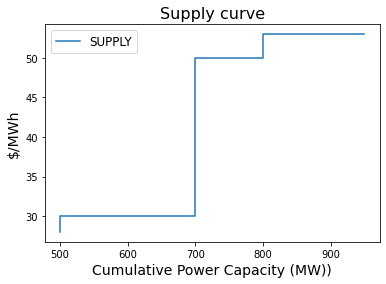

In [74]:
plt.step(SupplySorted["CUMCAP(MW)"],SupplySorted["Price($/MWh)"],label="SUPPLY")
plt.title("Supply curve",fontsize=16)
plt.xlabel("Cumulative Power Capacity (MW))", fontsize=14)
plt.ylabel("$/MWh",fontsize=14)
plt.legend(fontsize=12)
plt.show()

In [75]:
## Add o first row that shows that any quantity below 500 can be purchased at the lowest bid price
LowestBid=SupplySorted.iloc[0,2] #store the lowest bid price into a variable
print("The lowest bid is",LowestBid,"$/MWh")
new_row = pd.DataFrame({'Company':'', 'Quantity(MW)':0, 'Price($/MWh)':LowestBid, 'CUMCAP(MW)':0}, index=[0])
SupplySorted = pd.concat([new_row,SupplySorted[:]]).reset_index(drop=True)
print (SupplySorted)

The lowest bid is 28 $/MWh
  Company  Quantity(MW)  Price($/MWh)  CUMCAP(MW)
0                     0            28           0
1       B           500            28         500
2       C           200            30         700
3       A           100            50         800
4       D           150            53         950


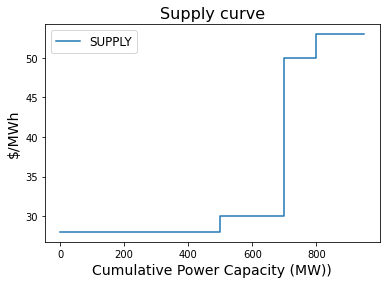

In [77]:
# Draw a step plot
plt.step(SupplySorted["CUMCAP(MW)"],SupplySorted["Price($/MWh)"],label="SUPPLY")
plt.title("Supply curve",fontsize=16)
plt.xlabel("Cumulative Power Capacity (MW))", fontsize=14)
plt.ylabel("$/MWh",fontsize=14)
plt.legend(fontsize=12)
plt.show()

### 3. Stack demands from highest offer to lowest

In [78]:
DemandSorted=df_demandData.sort_values("Price($/MWh)",ascending=False, ignore_index=True) #use ascending parameter to sort from high to low
DemandSorted.head(NumDemands)

,Company,Quantity(MW),Price($/MWh)
0,G,100,50
1,E,500,40
2,F,300,29


### 4. Create demand curve

In [79]:
# Create a column with the cummulative capacity [MW] offered to be puchased at that PRICE or less and initialize in zero
DemandSorted["CUMCAP(MW)"]=0

In [80]:
DemandSorted.head(NumDemands)

,Company,Quantity(MW),Price($/MWh),CUMCAP(MW)
0,G,100,50,0
1,E,500,40,0
2,F,300,29,0


In [81]:
# Fill the CUMCAP column. The first row is just the QUANTITY of that demand (in that row)
DemandSorted.iloc[0,3]=DemandSorted.iloc[0,1]
# Now walk through all the rows adding the cumulative capacity. Start at row 1 since row 0 has already the right CUMCAP
for i in range (1,NumDemands):  
                DemandSorted.iloc[i,3]=DemandSorted.iloc[i-1,3]+DemandSorted.iloc[i,1]
DemandSorted.head(NumDemands)

,Company,Quantity(MW),Price($/MWh),CUMCAP(MW)
0,G,100,50,100
1,E,500,40,600
2,F,300,29,900


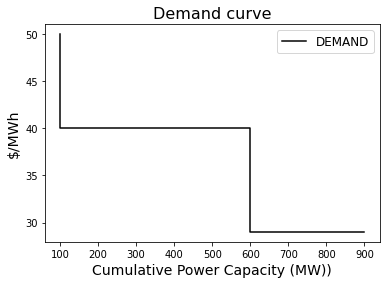

In [82]:
plt.step(DemandSorted["CUMCAP(MW)"],DemandSorted["Price($/MWh)"],label="DEMAND",color="black")
plt.title("Demand curve",fontsize=16)
plt.xlabel("Cumulative Power Capacity (MW))", fontsize=14)
plt.ylabel("$/MWh",fontsize=14)
plt.legend(fontsize=12)
plt.show()

In [83]:
## Add a new first row that shows that any quantity below 50 can be purchased at the highest offered price
# Store the highest oferred price in a variable
HighestOffer=DemandSorted.iloc[0,2]
print("The highest offered price is", HighestOffer,"$/MWh")
new_row = pd.DataFrame({'Company':'', 'Quantity(MW)':0, 'Price($/MWh)':HighestOffer, 'CUMCAP(MW)':0}, index=[0])
DemandSorted = pd.concat([new_row,DemandSorted[:]]).reset_index(drop=True)
print (DemandSorted)

The highest offered price is 50 $/MWh
  Company  Quantity(MW)  Price($/MWh)  CUMCAP(MW)
0                     0            50           0
1       G           100            50         100
2       E           500            40         600
3       F           300            29         900


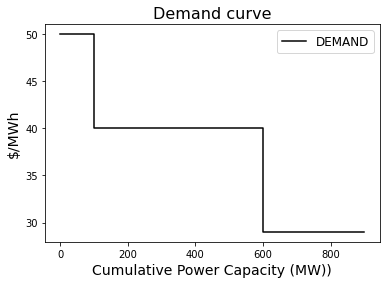

In [85]:
plt.step(DemandSorted["CUMCAP(MW)"],DemandSorted["Price($/MWh)"],label="DEMAND",color="black")
plt.title("Demand curve",fontsize=16)
plt.xlabel("Cumulative Power Capacity (MW))", fontsize=14)
plt.ylabel("$/MWh",fontsize=14)
plt.legend(fontsize=12)
plt.show()

### Plot both curves in the same chart

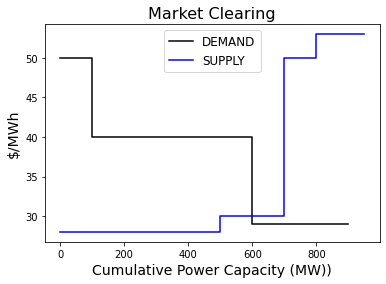

In [87]:
plt.step(DemandSorted["CUMCAP(MW)"],DemandSorted["Price($/MWh)"],label="DEMAND",color="black")
plt.step(SupplySorted["CUMCAP(MW)"],SupplySorted["Price($/MWh)"],label="SUPPLY",color="blue")
plt.title("Market Clearing",fontsize=16)
plt.xlabel("Cumulative Power Capacity (MW))", fontsize=14)
plt.ylabel("$/MWh",fontsize=14)
plt.legend(fontsize=12)
plt.show()